# Heart Disease Research Part II

In this project, you will investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the <a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">UCI Machine Learning Repository</a> and then cleaned for analysis. The principal investigators responsible for data collection were:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
heart = pd.read_csv('heart_disease.csv')

## Inspect the Data

1. The data has been saved as a dataframe named heart in script.py. It contains the following variables:

    * `age`: age in years
    * `sex`: sex assigned at birth; `'male'` or `'female'`
    * `trestbps`: resting blood pressure in mm Hg
    * `chol`: serum cholesterol in mg/dl
    * `cp`: chest pain type (`'typical angina'`, `'atypical angina'`, `'non-anginal pain'`, or `'asymptomatic'`)
    * `exang`: whether the patient experiences exercise-induced angina (`1`: yes; `0`: no)
    * `fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (`1`: yes; `0`: no)
    * `thalach`: maximum heart rate achieved in exercise test
    * `heart_disease`: whether the patient is found to have heart disease (`'presence'`: diagnosed with heart disease; `'absence'`: no heart disease)

    Inspect the first few rows of data using the `.head()` method.

In [2]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


## Predictors of Heart Disease

2. Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.

    Is `thalach` associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of `thalach` for patients who were and were not diagnosed with heart disease (indicated by the `heart_disease` variable). Do you think there is a relationship between these variables?

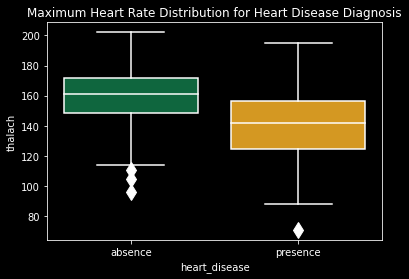

In [3]:
PROPS = {
    'boxprops': {'edgecolor':'white'},
    'medianprops': {'color':'white'},
    'whiskerprops': {'color':'white'},
    'capprops': {'color':'white'},
    'flierprops': {
                    'markerfacecolor':'white',
                    'markeredgecolor': 'white',
                    'markersize': 12
                }
}

EXOTIC_ORCHIDS_COLOR_SCHEME = {
    'dark_blue': '#192E5B',
    'medium_blue': '#1D65A6',
    'light_blue': '#72A2C0',
    'green': '#00743F',
    'yellow': '#F2A104'   
}

my_pal = {
    "absence": EXOTIC_ORCHIDS_COLOR_SCHEME['green'],
    "presence": EXOTIC_ORCHIDS_COLOR_SCHEME['yellow'],
}

plt.style.use('dark_background')

sns.boxplot(x=heart.heart_disease, y=heart.thalach, palette=my_pal , **PROPS).set_title('Maximum Heart Rate Distribution for Heart Disease Diagnosis')
plt.show()

3. In order to investigate this question further, save the values for `thalach` among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of `thalach` among patients who were not diagnosed with heart disease as `thalach_no_hd`.

In [4]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

4. Calculate and print the difference in mean `thalach` for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [5]:
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print(f'thalach mean Difference: {mean_diff:0.2f}')

median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print(f'thalach median Difference: {median_diff:0.2f}')

thalach mean Difference: 19.12
thalach median Difference: 19.00


5. We would like to find out if the average `thalach` of a heart disease patient is *significantly different* from the average `thalach` for a person without heart disease.

    Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:
    * Null: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.
    * Alternative: The average `thalach` for a person with heart disease is NOT equal to the average   `thalach` for a person without heart disease.


In [6]:
from scipy.stats import ttest_ind

6. Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average `thalach` for people with heart disease compared to people with no heart disease?

In [7]:
_, pval = ttest_ind(a=thalach_hd, b=thalach_no_hd)
pval

3.456964908430172e-14

In [8]:
significance_threshold = 0.05
print(f'The difference in average thalach is significant: {pval < significance_threshold}')

The difference in average thalach is significant: True


7. Using the same process, investigate at least one other quantitative variable. Options include age, trestbps (resting blood pressure), and chol (cholesterol). Are any of these variables also significantly associated with heart disease?

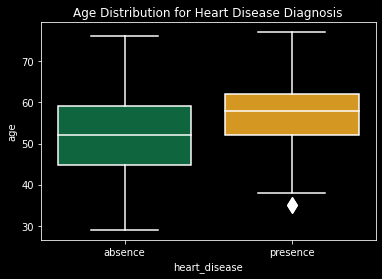

In [9]:
sns.boxplot(x=heart.heart_disease, y=heart.age, palette=my_pal , **PROPS).set_title('Age Distribution for Heart Disease Diagnosis')
plt.show()

In [10]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

mean_diff = np.mean(age_no_hd) - np.mean(age_hd)
print(f'age mean Difference: {mean_diff:0.2f}')

median_diff = np.median(age_no_hd) - np.median(age_hd)
print(f'age median Difference: {median_diff:0.2f}')

_, pval = ttest_ind(a=age_hd, b=age_no_hd)
print(f'pval: {pval:0.2e}')

significance_threshold = 0.05
print(f'The difference in average age is significant: {pval < significance_threshold}')

age mean Difference: -4.04
age median Difference: -6.00
pval: 8.96e-05
The difference in average age is significant: True


## Chest Pain and Max Heart Rate

8. Next, let us investigate the relationship between `thalach` (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data.

    Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

Text(0.5, 1.0, 'Maximum Heart Rate Distribution for Chest Pain Type')

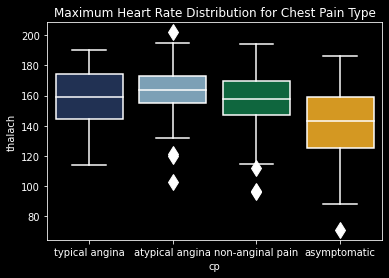

In [11]:
my_pal = {
    'typical angina': EXOTIC_ORCHIDS_COLOR_SCHEME['dark_blue'],
    'atypical angina': EXOTIC_ORCHIDS_COLOR_SCHEME['light_blue'],
    'non-anginal pain': EXOTIC_ORCHIDS_COLOR_SCHEME['green'],
    'asymptomatic': EXOTIC_ORCHIDS_COLOR_SCHEME['yellow']
}

sns.boxplot(
    x=heart.cp,
    y=heart.thalach,
    palette=my_pal,
    order = [
        'typical angina',
        'atypical angina',
        'non-anginal pain',
        'asymptomatic'        
        ],
    **PROPS)\
.set_title('Maximum Heart Rate Distribution for Chest Pain Type')

10. Run a single hypothesis test to address the following null and alternative hypotheses:

    * Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average `thalach`.
    * Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people **do not** all have the same average `thalach`.

    Save the resulting p-value as `pval` and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different `thalach`?

In [12]:
from scipy.stats import f_oneway


typical_angina_thalach = heart.thalach[heart.cp == 'typical angina']
atypical_angina_thalach = heart.thalach[heart.cp == 'atypical angina']
non_anginal_pain_thalach = heart.thalach[heart.cp == 'non-anginal pain']
asymptomatic_thalach = heart.thalach[heart.cp == 'asymptomatic']

_, pval = f_oneway(
    typical_angina_thalach,
    atypical_angina_thalach,
    non_anginal_pain_thalach,
    asymptomatic_thalach
    )

print(f'{pval:0.2e}')

1.91e-10


11. If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (`cp`) for which people with those pain types have significantly different average max heart rates during exercise ( `thalach`).

    Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

*Hint: For any pair where `reject` is `True`, we conclude that people with those chest pain types have significantly different maximum heart rates during exercise.*

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(
    endog=heart.thalach,
    groups=heart.cp,
    alpha=significance_threshold
    )

print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


## Heart Disease and Chest Pain

12. Finally, let us investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of `cp` and `heart_disease` and save it as `xtab`, then print it out.

In [14]:
xtab = pd.crosstab(heart.cp, heart.heart_disease)
xtab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


13. Run a hypothesis test for the following null and alternative hypotheses:

    * Null: There is **not** an association between chest pain type and whether or not someone is diagnosed with heart disease.
    * Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

    Save the p-value as `pval` and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [15]:
from scipy.stats import chi2_contingency
_, pval, _, _ = chi2_contingency(xtab)
pval

1.2517106007837527e-17

In [16]:
significant = pval < significance_threshold
significant

True

14. Congratulations! You have used a sample of data to understand how health related outcomes are associated with heart disease. Now that you have gotten your feet wet, there are a number of additional variables in this dataset that we have not looked at yet! If you want additional practice, use this space to continue your investigation. What other variables might be predictive of heart disease? Can you identify which hypothesis test to use for each variable? 